<h1>Tutorial 2</h1>

@Author: SharkChilli_zx<br>
@Date: Oct 2019

**Links:**

1. [Gallery](https://matplotlib.org/gallery/index.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Tutorial</h2>

If providing a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values. Since python ranges start with 0, the default x vector has the same length as y but starts with 0.

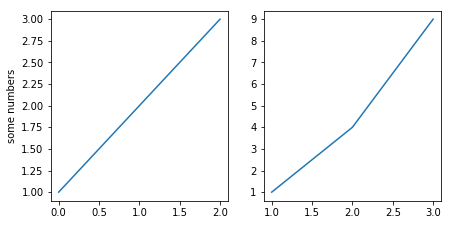

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3.5))

ax1.plot([1, 2, 3])
ax1.set_ylabel('some numbers')
ax2.plot([1,2,3], [1, 4, 9])

plt.show()

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the **color** and **line type** of the plot.<br>
The default format string is 'b-', which is a solid blue line.

The `axis()` command in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

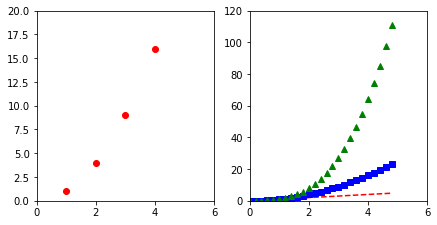

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3.5))

ax1.plot([1,2,3,4], [1,4,9,16], 'ro')
ax1.axis([0,6, 0,20])

t = np.arange(0., 5., 0.2)
ax2.plot(t, t, 'r--',
         t, t**2, 'bs', 
         t, t**3, 'g^')
ax2.axis([0,6, 0,120])

plt.show()

<h3>Plotting With Keyword String</h3>

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with `numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows to provide such an object with the data keyword argument. If provided, then may generate plots with the strings corresponding to these variables.

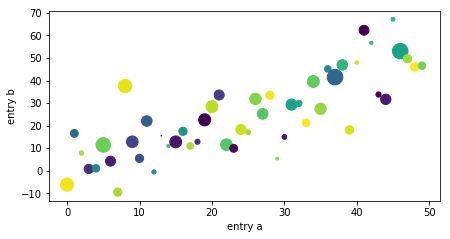

In [4]:
data0 = {'a': np.arange(50), 
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data0['b'] = data0['a'] + 10*np.random.randn(50)
data0['d'] = np.abs(data0['d'])*100

plt.figure(figsize=(7, 3.5))
plt.scatter('a', 'b', c='c', s='d', data=data0)
plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

<h3>Plotting With Categorical Variables</h3>

It is also possible to create a plot using categorical variables. 

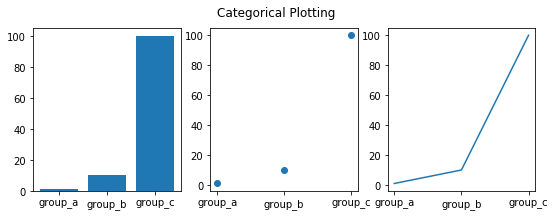

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

<h3>Controlling Line Properties</h3>

Lines have many attributes that can be set: linewidth, dash style, antialiased, etc; see [matplotlib.lines.Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). There are several ways to set line properties



<h2>Gallery</h2>

<h3>Lines, Bars & Markers</h3>

<h4>Stacked Bar Graph</h4>

Note the parameters `yerr` used for error bars, and `bottom` to stack the women's bars on top of the men's bars.

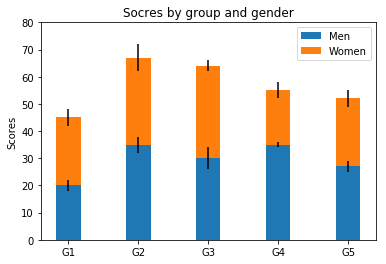

In [16]:
men_means, men_std = [20, 35, 30, 35, 27], [2, 3, 4, 1, 2]
women_means, women_std = [25, 32, 34, 20, 25], [3, 5, 2, 3, 3]
N = 5 

ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, men_means, width, yerr=men_std)
p2 = plt.bar(ind, women_means, width, 
             bottom=men_means, yerr=women_std)

plt.ylabel('Scores')
plt.title('Socres by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

<h4>Grouped Bar Chart With Labels</h4>

Bar charts are useful for visualizing counts, or summary statistics with error bars.

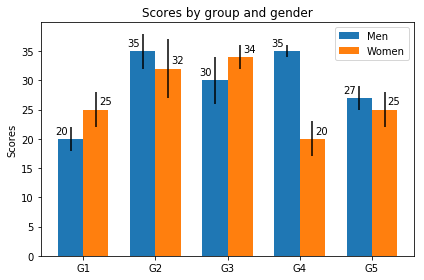

In [19]:
men_means, men_std = [20, 35, 30, 35, 27], [2, 3, 4, 1, 2]
women_means, women_std = [25, 32, 34, 20, 25], [3, 5, 2, 3, 3]

ind = np.arange(len(men_means)) # the x locations for the groups
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind-width/2, men_means, width, 
                yerr=men_std, label='Men')
rects2 = ax.bar(ind+width/2, women_means, width, 
                yerr=women_std, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend()


def autolabel(rects, xpos='center'):
    '''
    Attach a text label above each bar in *rects*, displaying its height
    
    *xpos* indicates which side to place the text 
    w.r.t the center of the bar.
    It can be one of the following
    {'center', 'right', 'left'}
    '''
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), 
                    xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(offset[xpos]*3, 3), # use 3 points offset
                    textcoords='offset points', # in both directions
                    ha=ha[xpos],
                    va='bottom')

        
autolabel(rects1, 'left')
autolabel(rects2, 'right')

fig.tight_layout()

plt.show()

<h4>Horizontal Bar chart</h4>

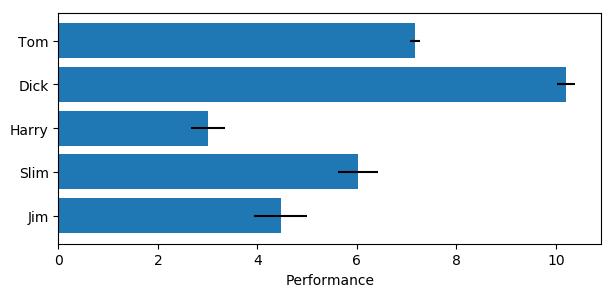

In [71]:
np.random.seed(1)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7, 3))

people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
y_pos = np.arange(len(people))
performance = 3+10*np.random.rand(len(people))
error = np.random.rand(len(people))
'''
reate an array of the given shape and populate it with random samples 
from a uniform distribution over [0, 1).
'''
ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')

plt.show()